<a href="https://colab.research.google.com/github/dspierre/data-ia/blob/dspierre-machinelearning/Case_study_Shippeo_version01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working Environment

This python environment contains most of the packages required for the task. **Shall you** need extra packages, you can access to the shell and can install like that: 

```shell
!pip install myPackage
```



```shell
!pip install -e git+https://github.com/scikit-learn/scikit-learn.git
```

# Challenge Description


### Dataset Information

This dataset contains information of shippements on a time window of approx 6 month.


### Content

There are 15 variables:

| Name | Description |
| -----| ----- | 
| mean_id |  unique ID of the truck |
| mean_organization_id |  unique ID of the carrier organization |
| organization_id |  unique ID of the shipper organization |
| agency_id |  unique ID of the shipper agency |
| origin_history_place_id |  unique ID of the origin of the trip |
| destination_history_place_id |  unique ID of the destination of the trip |
| trip_distance |  distance in meter of the trip returned by the routing API |
| trip_base_time |  duration estimated in second for the trip returned by the routing API |
| origin_slot_start | start of the time window for the appoinement at the origin |
| origin_slot_end |  end of the time window for the appoinement at the origin |
| destination_slot_start |  start of the time window for the appoinement at the destination |
| destination_slot_end |  end of the time window for the appoinement at the destination |
| origin_arrival_ts | arrival timestamp at the origin|
| destination_arrival_ts |  **Do not use as a feature:**  arrival timestamp at the destination  |
| trip_duration | **Target:** duration in seconds of the trip between origin and destination |


# Instructions

The goal of this study case is to predict the travel time of the truck between two warehouses. 

***The assessment is not done on the performance of the algorithm but rather on the explanation and coding skills***. Fairly good models with clean code and clear justifications will be prefered to high-performance models that are poorly explained. You are encouraged to provide as much details as you can in markdown cells or in comments, even if you have ideas you do not have time to explore. 

In the first part you are guided with intermediate steps that you are encouraged to follow. In the second part you can go wild...


# Data Loading

Load the train data set located at `./interview_dataset.csv`

In [ ]:
!pip install myPackage

In [ ]:
!pip install -e git+https://github.com/scikit-learn/scikit-learn.git

ERROR: Could not detect requirement name for 'git+https://github.com/scikit-learn/scikit-learn.git', please specify one with #egg=your_package_name


In [ ]:
import os
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# dataprocessing 

In [ ]:
df_processing =pd.read_csv('/content/sample_data/dataprocessing3.csv', sep=';',encoding='utf8') 
df_processing

,Unnamed: 0,Unnamed: 0.1,mean_id,mean_organization_id,organization_id,agency_id,origin_history_place_id,destination_history_place_id,trip_distance,trip_base_time,origin_slot_start,origin_slot_end,destination_slot_start,destination_slot_end,origin_arrival_ts,destination_arrival_ts,trip_duration
0,0,0,53431.0,4258,2693,2694.0,125338,34889,142734.0,9180.0,1602651600,1602651600,1602666900,1602666900,1602652091,1602664914,12823
1,1,1,53438.0,4258,2693,2694.0,125338,34889,118589.0,9261.0,1603692000,1603692000,1603707300,1603707300,1603692296,1603704207,11911
2,2,2,53420.0,4258,2693,2694.0,35823,104707,234555.0,13708.0,1596042000,1596042000,1596058200,1596058200,1596038640,1596051629,12989
3,3,3,53420.0,4258,2693,2694.0,35823,104707,235880.0,13649.0,1598979600,1598979600,1598995800,1598995800,1598976343,1598993754,17411
4,4,4,46011.0,4018,2693,2694.0,125338,33769,36567.0,4165.0,1602228600,1602228600,1602239400,1602239400,1602227628,1602237671,10043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105107,105107,105107,31374.0,1273,2693,2694.0,35823,104710,244617.0,14763.0,1597271400,1597271400,1597293000,1597293000,1597271040,1597289668,18628
105108,105108,105108,31374.0,1273,2693,2694.0,35823,34386,283926.0,16759.0,1593421200,1593421200,1593442800,1593442800,1593418821,1593440934,22113
105109,105109,105109,109263.0,1273,2693,2694.0,45572,114126,22230.0,2917.0,1593739800,1593739800,1593745200,1593745200,1593737730,1593744420,6690
105110,105110,105110,49677.0,1273,2693,2694.0,35823,25931,31404.0,3240.0,1591603200,1591603200,1591612200,1594098000,1591599853,1591604009,4156


In [ ]:
df_processing.dtypes

Unnamed: 0                        int64
Unnamed: 0.1                      int64
mean_id                         float64
mean_organization_id              int64
organization_id                   int64
agency_id                       float64
origin_history_place_id           int64
destination_history_place_id      int64
trip_distance                   float64
trip_base_time                  float64
origin_slot_start                 int64
origin_slot_end                   int64
destination_slot_start            int64
destination_slot_end              int64
origin_arrival_ts                 int64
destination_arrival_ts            int64
trip_duration                     int64
dtype: object

In [ ]:
df_processing

,Unnamed: 0,Unnamed: 0.1,mean_id,mean_organization_id,organization_id,agency_id,origin_history_place_id,destination_history_place_id,trip_distance,trip_base_time,origin_slot_start,origin_slot_end,destination_slot_start,destination_slot_end,origin_arrival_ts,destination_arrival_ts,trip_duration
0,0,0,53431.0,4258,2693,2694.0,125338,34889,142734.0,9180.0,1602651600,1602651600,1602666900,1602666900,1602652091,1602664914,12823
1,1,1,53438.0,4258,2693,2694.0,125338,34889,118589.0,9261.0,1603692000,1603692000,1603707300,1603707300,1603692296,1603704207,11911
2,2,2,53420.0,4258,2693,2694.0,35823,104707,234555.0,13708.0,1596042000,1596042000,1596058200,1596058200,1596038640,1596051629,12989
3,3,3,53420.0,4258,2693,2694.0,35823,104707,235880.0,13649.0,1598979600,1598979600,1598995800,1598995800,1598976343,1598993754,17411
4,4,4,46011.0,4018,2693,2694.0,125338,33769,36567.0,4165.0,1602228600,1602228600,1602239400,1602239400,1602227628,1602237671,10043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105107,105107,105107,31374.0,1273,2693,2694.0,35823,104710,244617.0,14763.0,1597271400,1597271400,1597293000,1597293000,1597271040,1597289668,18628
105108,105108,105108,31374.0,1273,2693,2694.0,35823,34386,283926.0,16759.0,1593421200,1593421200,1593442800,1593442800,1593418821,1593440934,22113
105109,105109,105109,109263.0,1273,2693,2694.0,45572,114126,22230.0,2917.0,1593739800,1593739800,1593745200,1593745200,1593737730,1593744420,6690
105110,105110,105110,49677.0,1273,2693,2694.0,35823,25931,31404.0,3240.0,1591603200,1591603200,1591612200,1594098000,1591599853,1591604009,4156


In [ ]:
print('Les colonnes de interview sont',df_processing.columns)

Les colonnes de interview sont Index(['Unnamed: 0', 'Unnamed: 0.1', 'mean_id', 'mean_organization_id',
       'organization_id', 'agency_id', 'origin_history_place_id',
       'destination_history_place_id', 'trip_distance', 'trip_base_time',
       'origin_slot_start', 'origin_slot_end', 'destination_slot_start',
       'destination_slot_end', 'origin_arrival_ts', 'destination_arrival_ts',
       'trip_duration'],
      dtype='object')


In [ ]:
df_processing.describe(include='all')

,Unnamed: 0,Unnamed: 0.1,mean_id,mean_organization_id,organization_id,agency_id,origin_history_place_id,destination_history_place_id,trip_distance,trip_base_time,origin_slot_start,origin_slot_end,destination_slot_start,destination_slot_end,origin_arrival_ts,destination_arrival_ts,trip_duration
count,105112.000000,105112.000000,105112.000000,105112.000000,105112.000000,105112.000000,105112.000000,105112.000000,105112.000000,105112.000000,1.051120e+05,1.051120e+05,1.051120e+05,1.051120e+05,1.051120e+05,1.051120e+05,105112.000000
mean,52555.500000,52555.500000,90242.026086,2469.092482,4502.262805,4448.756374,134358.023984,132625.222563,46135.541832,3710.757259,1.600236e+09,1.600238e+09,1.600247e+09,1.600066e+09,1.600235e+09,1.600246e+09,10595.470707
std,30343.365085,30343.365085,35556.213608,994.287036,1511.504275,1520.349841,78052.633882,75846.985850,42919.979252,2481.542524,4.663163e+06,4.664140e+06,4.664202e+06,4.713269e+06,4.663713e+06,4.664748e+06,16809.378811
min,0.000000,0.000000,8927.000000,1273.000000,2693.000000,2694.000000,25793.000000,25793.000000,0.000000,0.000000,1.591114e+09,1.591115e+09,1.591125e+09,1.591129e+09,1.591117e+09,1.591123e+09,3.000000
25%,26277.750000,26277.750000,82102.000000,1803.000000,2693.000000,2694.000000,44369.000000,44267.000000,17148.000000,1968.000000,1.596186e+09,1.596188e+09,1.596194e+09,1.595849e+09,1.596184e+09,1.596194e+09,4185.000000
50%,52555.500000,52555.500000,83718.000000,1803.000000,5765.000000,5766.000000,165477.000000,165494.000000,34602.000000,3237.000000,1.600848e+09,1.600851e+09,1.600862e+09,1.600667e+09,1.600849e+09,1.600862e+09,6422.000000
75%,78833.250000,78833.250000,89573.000000,2801.000000,5765.000000,5766.000000,168436.000000,168434.000000,57536.000000,4795.000000,1.604523e+09,1.604525e+09,1.604549e+09,1.604404e+09,1.604527e+09,1.604547e+09,9931.000000
max,105111.000000,105111.000000,226383.000000,5947.000000,5765.000000,5766.000000,416138.000000,462146.000000,323050.000000,21842.000000,1.606979e+09,1.606986e+09,1.606987e+09,1.606991e+09,1.606984e+09,1.606989e+09,254484.000000


* Regardez les valeurs manquantes et comment vous pouvez les imputer.
* Calculez quelques statistiques descriptives. 
* Calculez éventuellement les fonctionnalités

In [ ]:
df_processing.isnull().sum()

Unnamed: 0                      0
Unnamed: 0.1                    0
mean_id                         0
mean_organization_id            0
organization_id                 0
agency_id                       0
origin_history_place_id         0
destination_history_place_id    0
trip_distance                   0
trip_base_time                  0
origin_slot_start               0
origin_slot_end                 0
destination_slot_start          0
destination_slot_end            0
origin_arrival_ts               0
destination_arrival_ts          0
trip_duration                   0
dtype: int64

In [ ]:
%pip  install missingno

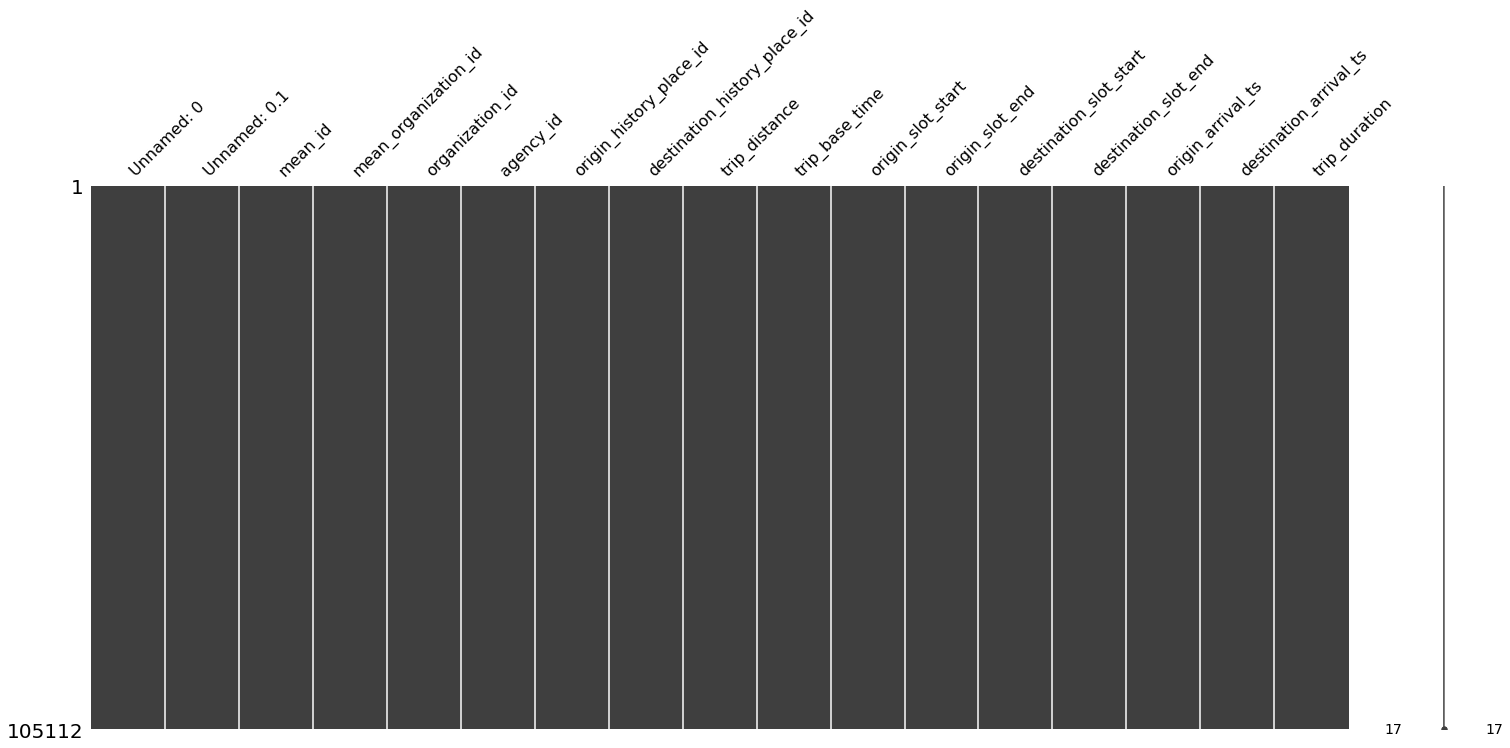

In [ ]:
import missingno as  msno
msno.matrix(df_processing)

In [ ]:
df =pd.read_csv('/content/sample_data/dataprocessing3.csv', sep=';',encoding='utf8') 
df

,Unnamed: 0,Unnamed: 0.1,mean_id,mean_organization_id,organization_id,agency_id,origin_history_place_id,destination_history_place_id,trip_distance,trip_base_time,origin_slot_start,origin_slot_end,destination_slot_start,destination_slot_end,origin_arrival_ts,destination_arrival_ts,trip_duration
0,0,0,53431.0,4258,2693,2694.0,125338,34889,142734.0,9180.0,1602651600,1602651600,1602666900,1602666900,1602652091,1602664914,12823
1,1,1,53438.0,4258,2693,2694.0,125338,34889,118589.0,9261.0,1603692000,1603692000,1603707300,1603707300,1603692296,1603704207,11911
2,2,2,53420.0,4258,2693,2694.0,35823,104707,234555.0,13708.0,1596042000,1596042000,1596058200,1596058200,1596038640,1596051629,12989
3,3,3,53420.0,4258,2693,2694.0,35823,104707,235880.0,13649.0,1598979600,1598979600,1598995800,1598995800,1598976343,1598993754,17411
4,4,4,46011.0,4018,2693,2694.0,125338,33769,36567.0,4165.0,1602228600,1602228600,1602239400,1602239400,1602227628,1602237671,10043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105107,105107,105107,31374.0,1273,2693,2694.0,35823,104710,244617.0,14763.0,1597271400,1597271400,1597293000,1597293000,1597271040,1597289668,18628
105108,105108,105108,31374.0,1273,2693,2694.0,35823,34386,283926.0,16759.0,1593421200,1593421200,1593442800,1593442800,1593418821,1593440934,22113
105109,105109,105109,109263.0,1273,2693,2694.0,45572,114126,22230.0,2917.0,1593739800,1593739800,1593745200,1593745200,1593737730,1593744420,6690
105110,105110,105110,49677.0,1273,2693,2694.0,35823,25931,31404.0,3240.0,1591603200,1591603200,1591612200,1594098000,1591599853,1591604009,4156


In [ ]:
pourcentate_agency_id =100*df_processing.agency_id.isnull().sum()/len(df_processing.agency_id)
print(pourcentate_agency_id)

0.0


In [ ]:
pourcentate_mean_id =100*df.mean_id.isnull().sum()/len(df.mean_id)
print(pourcentate_mean_id)

0.0


In [ ]:
pourcentate_destination_slot_end =100*df.destination_slot_end.isnull().sum()/len(df.destination_slot_end)
print(pourcentate_destination_slot_end)

0.0


In [ ]:
pourcentate_mean_organization_id  =100*df.mean_organization_id.isnull().sum()/len(df.destination_slot_end)
print(pourcentate_destination_slot_end)

0.0


In [ ]:
pourcentate_agency_id  =100*df.agency_id.isnull().sum()/len(df.agency_id)
print(pourcentate_destination_slot_end)

0.0


In [ ]:
pourcentate_origin_history_place_id =100*df.origin_history_place_id.isnull().sum()/len(df.origin_history_place_id)
print(pourcentate_origin_history_place_id )

0.0


In [ ]:
pourcentate_destination_history_place_id =100*df.destination_history_place_id.isnull().sum()/len(df.destination_history_place_id)
print(pourcentate_destination_history_place_id )

0.0


In [ ]:
pourcentate_trip_distance =100*df.trip_distance.isnull().sum()/len(df.trip_distance)
print(pourcentate_trip_distance)

0.0


In [ ]:
pourcentate_trip_base_time =100*df.trip_base_time.isnull().sum()/len(df.trip_base_time)
print(pourcentate_trip_base_time)

0.0


In [ ]:
pourcentate_origin_slot_start =100*df.trip_base_time.isnull().sum()/len(df.origin_slot_start)
print(pourcentate_origin_slot_start)

0.0


In [ ]:
pourcentate_origin_slot_end =100*df.trip_base_time.isnull().sum()/len(df.origin_slot_end)
print(pourcentate_origin_slot_end)

0.0


In [ ]:
df_processing.isnull().sum()

Unnamed: 0                      0
Unnamed: 0.1                    0
mean_id                         0
mean_organization_id            0
organization_id                 0
agency_id                       0
origin_history_place_id         0
destination_history_place_id    0
trip_distance                   0
trip_base_time                  0
origin_slot_start               0
origin_slot_end                 0
destination_slot_start          0
destination_slot_end            0
origin_arrival_ts               0
destination_arrival_ts          0
trip_duration                   0
dtype: int64

# Datavisualisation 

In [ ]:
df_processing.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'mean_id', 'mean_organization_id',
       'organization_id', 'agency_id', 'origin_history_place_id',
       'destination_history_place_id', 'trip_distance', 'trip_base_time',
       'origin_slot_start', 'origin_slot_end', 'destination_slot_start',
       'destination_slot_end', 'origin_arrival_ts', 'destination_arrival_ts',
       'trip_duration'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


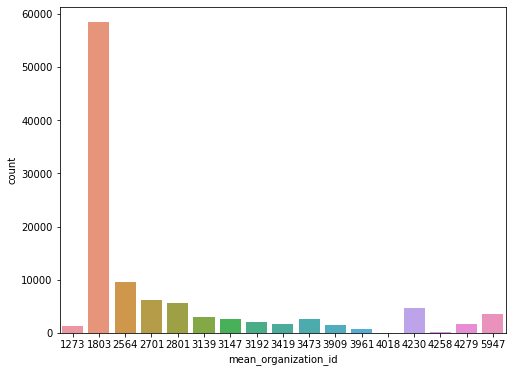

In [ ]:
sns.countplot('mean_organization_id', data=df_processing)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


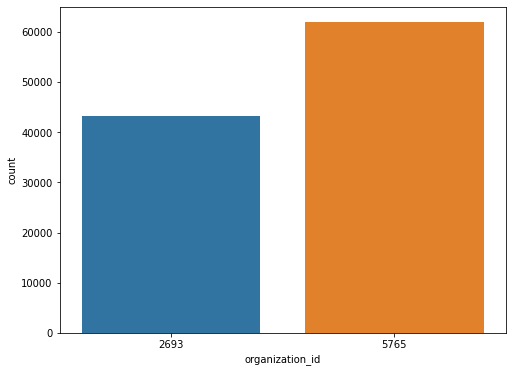

In [ ]:
# analyse organization_id
sns.countplot('organization_id', data=df_processing)
plt.show()

In [ ]:
cordia=df_processing.corr()
print(cordia)

                              Unnamed: 0  ...  trip_duration
Unnamed: 0                      1.000000  ...      -0.056234
Unnamed: 0.1                    1.000000  ...      -0.056234
mean_id                        -0.140262  ...       0.055125
mean_organization_id            0.478984  ...      -0.125597
organization_id                -0.469873  ...       0.121625
agency_id                      -0.452759  ...       0.116307
origin_history_place_id        -0.384262  ...       0.069011
destination_history_place_id   -0.376908  ...       0.087505
trip_distance                  -0.109906  ...       0.188585
trip_base_time                 -0.059147  ...       0.178010
origin_slot_start              -0.209904  ...       0.059764
origin_slot_end                -0.210076  ...       0.059900
destination_slot_start         -0.210057  ...       0.063302
destination_slot_end           -0.202512  ...       0.062532
origin_arrival_ts              -0.209971  ...       0.059772
destination_arrival_ts  

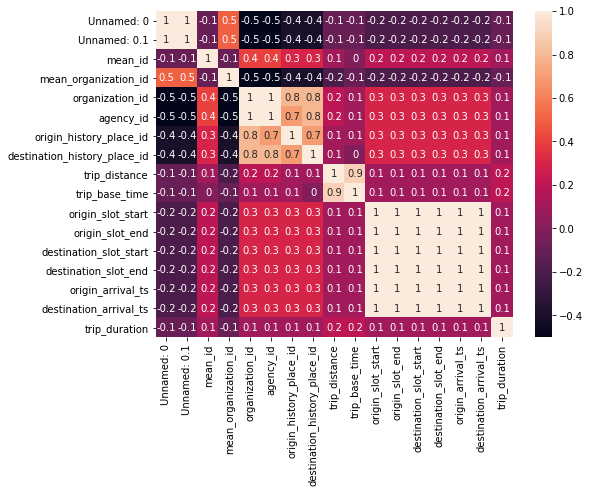

In [ ]:
matrice_corr = df_processing.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)
#On affiche la matrice sous forme de carte thermique (heatmap

##Model

Split your data in train / test and train as usual. 
Train a model of your choice and evaluate it with a relevant metric. 

# creation  des  tests et des trains

In [ ]:
X2=df_processing.drop(['trip_duration','organization_id','mean_organization_id','Unnamed: 0.1','Unnamed: 0','mean_id','origin_history_place_id','destination_history_place_id'],axis=1)

In [ ]:
Target=df_processing.drop(['mean_organization_id','organization_id','origin_history_place_id','destination_history_place_id',
'trip_distance','trip_base_time','origin_slot_start','origin_slot_end','destination_slot_start','origin_arrival_ts','destination_arrival_ts',
'destination_slot_end','mean_id','agency_id','Unnamed: 0.1','Unnamed: 0'	],axis=1)

In [ ]:
Target.head(10)

,trip_duration
0,12823
1,11911
2,12989
3,17411
4,10043
5,14493
6,7475
7,12953
8,70183
9,12814


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X2,Target,test_size=0.3,random_state=42)
print(X_train)

        agency_id  trip_distance  ...  origin_arrival_ts  destination_arrival_ts
102413     2694.0         5012.0  ...         1600644232              1600649136
62011      5766.0         5486.0  ...         1602478246              1602480310
59456      5766.0        15524.0  ...         1606837958              1606879519
99725      2694.0        49376.0  ...         1593469466              1593478572
1518       2694.0        18826.0  ...         1593830769              1593836921
...           ...            ...  ...                ...                     ...
54886      5766.0         6272.0  ...         1594354001              1594356337
76820      2694.0        54047.0  ...         1591935793              1591939842
103694     2694.0         1166.0  ...         1595564470              1595568754
860        2694.0        38207.0  ...         1604991838              1604996156
15795      5766.0        11506.0  ...         1605780047              1605848516

[73578 rows x 9 columns]


In [ ]:
print(y_train)

        trip_duration
102413           4904
62011            2064
59456           41561
99725            9106
1518             6152
...               ...
54886            2336
76820            4049
103694           4284
860              4318
15795           68469

[73578 rows x 1 columns]


In [ ]:
print(y_test)

       trip_duration
84858           4179
37217           4212
64923           5294
21250          74377
64241           9743
...              ...
48433           3740
66499          11583
49667           9180
35852           3050
75793          10161

[31534 rows x 1 columns]


#Etude  pour la  programmation  des  modele 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, Target, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(84089, 9)
(21023, 9)
(84089, 1)
(21023, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, y_train)
print(lmodellineaire.fit(X_train, y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [ ]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 3.388855337692047e-07
le score R2 est 1.0


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 3.381973195871092e-07
le score R2 est 1.0


In [ ]:
# affichage des resultats de la regression lineaire 

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-6, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20]}
ridge_regress_train = GridSearchCV(ridge, parameters, scoring="r2", cv=5)
ridge_regress_train.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-06, 0.0001, 0.001,
                                   0.01, 0.1, 1, 5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
print(ridge_regress_train.best_params_)
print(ridge_regress_train.best_score_)
print(ridge_regress_train.best_estimator_)

predtrain_ridge = ridge_regress_train.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,predtrain_ridge)))
print(r2_score(y_train, predtrain_ridge))

{'alpha': 1e-15}
1.0
Ridge(alpha=1e-15, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
4.325897940102323e-06
1.0


In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-6, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20]}
ridge_regress_test = GridSearchCV(ridge, parameters, scoring="r2", cv=5)
ridge_regress_test.fit(X_test,y_test)
ridge_regress_test.score(X_test,y_test)

1.0

In [ ]:

print(ridge_regress_test.best_params_)
print(ridge_regress_test.best_score_)
print(ridge_regress_test.best_estimator_)
predtest_ridge = ridge_regress_test.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,predtest_ridge))) 
print(r2_score(y_test, predtest_ridge))

{'alpha': 1e-15}
1.0
Ridge(alpha=1e-15, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
6.54432075558166e-06
1.0


In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-6, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20]}
lasso_regress_train = GridSearchCV(lasso, parameters, scoring="r2", cv=5)
%time lasso_regress_train.fit(X_train,y_train)

print(lasso_regress_train.best_params_)
print(lasso_regress_train.best_score_)
print(lasso_regress_train.best_estimator_)
predtrain_lasso = lasso_regress_train.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,predtrain_lasso)))
print(r2_score(y_train, predtrain_lasso))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8754341614888.795, tolerance: 1923203398.9458337
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8573164879226.061, tolerance: 1879118769.6840582
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8551667577346.043, tolerance: 1877623861.9149466
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 861627005

CPU times: user 2min 3s, sys: 20.2 s, total: 2min 23s
Wall time: 1min 15s
{'alpha': 1e-15}
0.08871397840545955
Lasso(alpha=1e-15, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
15979.395833421528
0.08881557982097632


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10735688509007.559, tolerance: 2356424950.0443144
  positive)


In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic_net_test = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_test, y_test)

scores_test = cross_val_score(elastic_net_test,X_test,y_test,cv=5,scoring='r2')

print('CV Mean: ', np.mean(scores_test))
print('STD: ', np.std(scores_test))

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [1e-15, 1e-10, 1e-8, 1e-6, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)

grid_test = GridSearchCV(estimator=elastic_net_test, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result_test = grid_test.fit(X_test, y_test)

print('meilleur  score: ', grid_result_test.best_score_)
print('meileur  parametre: ', grid_result_test.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2792209020336.273, tolerance: 613531911.2935616
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2283905696685.8984, tolerance: 502123741.44255686
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2117482379059.6243, tolerance: 464604936.0817268
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230854328

CV Mean:  0.0895172174754102
STD:  0.00679936032659406
Fitting 5 folds for each of 84 candidates, totalling 420 fits


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2291763578996.977, tolerance: 502978135.6117018
  positive)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:  1.4min finished


meilleur  score:  0.08951747480711811
meileur  parametre:  {'alpha': 1000, 'l1_ratio': 1e-08}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2792220779262.1045, tolerance: 613531911.2935616
  positive)



# Optimization 

Optimize the hyperparameters of your algorithm


In [6]:
import numpy as np                      
import pandas as pd  

# Plot
import matplotlib.pyplot as plt         
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler,LabelBinarizer 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,LogisticRegression, LogisticRegressionCV, RidgeCV, LassoCV, ElasticNet
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
# from sklearn import neighbors 
# from sklearn.naive_bayes import GaussianNB , ComplementNB,CategoricalNB              
# Metrics : 
from sklearn.metrics import mean_squared_error, r2_score,roc_curve, roc_auc_score, auc 
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score
from sklearn.dummy import DummyRegressor

# Optimization / Validation :
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

from sklearn import svm, datasets,preprocessing
regression = {
        
       'RF': { 'model':RandomForestRegressor(),
              'param':{
                  'clf__n_estimators': [100, 200, 300],
                'clf__max_depth': [1, 5, 10],
#                   'clf__min_samples_split': [1,5,10,15]
#                   'cl_max_leaf_nodes': [ 100, 200, 300, 400, 500, 600, 650, 700, 800]
                  },
             },
        'Lasso': { 'model': LassoCV(),
                'param': {'clf__alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
             },
    
        'Ridge': { 'model': RidgeCV(),
                'param': {'clf__alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
             },
    
        'Elastic': { 'model': ElasticNet(),
                'param': {'clf__alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'clf__l1_ratio' : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
                         }
             },
    
        'LR': { 'model': LogisticRegression(),
                'param': {'clf__penalty' : ['l1', 'l2'], 'clf__C' : np.logspace(-4, 4, 20), 'clf__solver' : ['liblinear']},
             },
       
        'SVR':{ 'model': SVR(),
                'param': {'clf__C': [0.1,1, 10, 100], 
                          'clf__gamma': [1,0.1,0.01,0.001],
                          'clf__kernel': ['rbf', 'poly', 'sigmoid'],
                         },
             },
      
        'XGB':{ "model":XGBRegressor(),
              "param":{"clf__learning_rate": [0.05,1,5],
                       'clf__n_estimators': [100,50],
#                        "clf__max_depth": [5,10,15]
                  },
            },
    
        'GradientBoost':{ "model":GradientBoostingRegressor(),
              "param":{"clf__model__alpha": [0.0, 0.5, 1.0],
                        "clf__ccp_alpha": [0.0, 0.5]
                  },
            },
    
        'decisionTree':{ "model":GradientBoostingRegressor(),
              "param":{"clf__criterion": ['mse', 'mae'],
                'clf__min_samples_leaf': [5, 10, 15, 20, 25],
                'clf__max_depth': [6, 9, 12, 15, 20],
                  },
            },
                 
}

In [15]:
from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

In [16]:
def modele_entier(cl, df_train, df_test):
    model = Pipeline(steps=[('preparation', preparation),
                            ('to_dense', DenseTransformer()),
                         ('clf', cl['model'] ) ])
    
    # ---------- PROCESSING & ENTRAINEMENT ----------

    param_grid = cl['param']

#     on sépare la cible du reste des données (dataset d'entraînement) 
    X = df_train.drop(['prix','nom','ref'], axis=1) # ON GARDE TOUTES LES COLONNES

    y = df_train['trip_duration']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)
    
    # Debut du decompte du temps
    start_time = time.time()

    # Model training avec Gridsearch
    grid = GridSearchCV(estimator=model, 
                        param_grid=param_grid, 
                        n_jobs=-1, cv=10, verbose=False, 
                        scoring='neg_root_mean_squared_error')
    grid.fit(X_train,y_train)
    print(grid.best_estimator_)
    
    # Score de l'entraînement
    rmse = grid.score(X_test, y_test)
    print(("RMSE  : %.5f" % rmse))
    
    # Temps d'entraînement
    times = (time.time() - start_time)
    print("Temps d'entraînement' : %s secondes ---" % times)    
    
    # --------------- PREDICTIONS ---------------
    
#     on sépare la cible du reste des données (dataset de test) 
    X_reel = df_test.drop(['trip_duration','organization_id',
                           'mean_organization_id','Unnamed: 0.1','Unnamed: 0','mean_id',
                           'origin_history_place_id','destination_history_place_id'], axis=1) # ON GARDE TOUTES LES COLONNES
#     X_reel = df_test.drop(['prix','nom','ref'], axis=1) # ON GARDE LES COLONNES CORRELEES FORTEMENT
    y_reel = df_test['trip_duration']  
    y_pred = grid.predict(X_reel)   
    # RMSE de référence
    y_pred_reference = grid.predict(X_test)
    dr = DummyRegressor()
    dr.fit(X_test,y_test)
    y_reference = dr.predict(X_test)
    rmse_reference = mean_squared_error(y_reference, y_pred_reference, squared=False)
    print(("RMSE dummy : %.5f" % rmse_reference))
    
    comparaison = pd.DataFrame(data=dic)
                                    
    return comparaison


In [14]:
svr_comp = modele_entier(regression['SVR'])

TypeError: ignored


# Performance

Evaluate the performance of the model using the relevant tools. 

Plot the following graph : MAE on y-axis and trip_duration on the x-axis with an x aggregation of 30 min. 


In [ ]:
#  MAE MEAN ABSOLUTE ERROR


# Part II 
In this part the goal is to see if our model can predict a delay or not. 

A truck is said as 'delayed' if it arrives more than 30 min after the destination_slot_end. Using a confusion matrix show how the previous model performs on the delays detection.

Use a classification model based on the previous dataset that predict if a truck will be delayed or not. Does it performs better than the regression model in delays detection? Use the right tools to compare the two models.

Dans cette partie, l'objectif est de voir si notre modèle peut prédire un retard ou non. Un camion est dit «retardé» s'il arrive plus de 30 minutes après la destination_slot_end. À l'aide d'une matrice de confusion, montrez comment le modèle précédent fonctionne sur la détection des retards. Utilisez un modèle de classification basé sur le jeu de données précédent qui prédisent si un camion sera retardé ou non. Est-ce qu'il fonctionne mieux que le modèle de régression dans la détection des retards? Utilisez les bons outils pour comparer les deux modèles.

In [ ]:
#labelisation des  variable
#randonforest 

In [ ]:
df_processing =pd.read_csv('/content/sample_data/dataprocessing3.csv', sep=';',encoding='utf8') 
df_processing

,Unnamed: 0,Unnamed: 0.1,mean_id,mean_organization_id,organization_id,agency_id,origin_history_place_id,destination_history_place_id,trip_distance,trip_base_time,origin_slot_start,origin_slot_end,destination_slot_start,destination_slot_end,origin_arrival_ts,destination_arrival_ts,trip_duration
0,0,0,53431.0,4258,2693,2694.0,125338,34889,142734.0,9180.0,1602651600,1602651600,1602666900,1602666900,1602652091,1602664914,12823
1,1,1,53438.0,4258,2693,2694.0,125338,34889,118589.0,9261.0,1603692000,1603692000,1603707300,1603707300,1603692296,1603704207,11911
2,2,2,53420.0,4258,2693,2694.0,35823,104707,234555.0,13708.0,1596042000,1596042000,1596058200,1596058200,1596038640,1596051629,12989
3,3,3,53420.0,4258,2693,2694.0,35823,104707,235880.0,13649.0,1598979600,1598979600,1598995800,1598995800,1598976343,1598993754,17411
4,4,4,46011.0,4018,2693,2694.0,125338,33769,36567.0,4165.0,1602228600,1602228600,1602239400,1602239400,1602227628,1602237671,10043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105107,105107,105107,31374.0,1273,2693,2694.0,35823,104710,244617.0,14763.0,1597271400,1597271400,1597293000,1597293000,1597271040,1597289668,18628
105108,105108,105108,31374.0,1273,2693,2694.0,35823,34386,283926.0,16759.0,1593421200,1593421200,1593442800,1593442800,1593418821,1593440934,22113
105109,105109,105109,109263.0,1273,2693,2694.0,45572,114126,22230.0,2917.0,1593739800,1593739800,1593745200,1593745200,1593737730,1593744420,6690
105110,105110,105110,49677.0,1273,2693,2694.0,35823,25931,31404.0,3240.0,1591603200,1591603200,1591612200,1594098000,1591599853,1591604009,4156


In [ ]:
result=30*60
print(result)
if  

1800


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))